# Install Dependencies

In [ ]:
!pip install torch 
!pip install torchvision
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.8 MB/s eta 0:00:00


In [ ]:
from torch import nn
from torch.optim import Adam 
from torch.utils.data import DataLoader 
from torchvision.transforms import ToTensor
import torch
from torchvision.models import densenet121 as densenet
from PIL import Image
import numpy as np
import pandas as pd


# Text Processing

In [ ]:
# downloading the data from OneDrive
drive_path = 'drive/MyDrive/chest-xrays'
projections_path = drive_path + '/indiana_projections.csv'
reports_path = drive_path + '/indiana_reports.csv'

# importing the projections and reports csv files 
df_projections = pd.read_csv(projections_path)
df_reports = pd.read_csv(reports_path)

# converting dataframes to np
projections = df_projections.to_numpy()
reports = df_reports.to_numpy()

# constructing an image to IUD dictionary and vise versa
image_to_uid = dict()
uid_to_image = dict()
for sample in range(len(projections)):
  if 'Frontal' in projections[sample, 2]:
    image_to_uid[projections[sample, 1]] = projections[sample, 0]
    uid_to_image[projections[sample,0]] = projections[sample,1]
df_projections
df_reports

# Image Conversion

In [ ]:
import os 
from PIL import Image
from torchvision.transforms import ToTensor, Resize

# importing all images to tensors and storing them in dictionaries with filenames as keys
#drive_path = 'drive/MyDrive/chest-xrays'
images_path = drive_path + '/images/images_normalized/'
os.chdir(images_path)
#images_path = os.path.join(path, drive_path, images_path)

convert_tensor = ToTensor()
resize = Resize([224, 224])
images = dict()
files = 0

for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
      if filename in image_to_uid:
        with Image.open(filename) as image:
          image.load()
          image = resize(image)
          images[filename] = convert_tensor(image)

os.chdir('..')
os.chdir('..')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

file = open('image_tensors.p', 'wb')
pickle.dump(images, file)
file.close()

In [ ]:
file = open('image_tensors.p', 'rb')
test = pickle.load(file)
file.close()

In [ ]:
l

tensor([[[0.2314, 0.2118, 0.2078,  ..., 0.1216, 0.1647, 0.2196],
         [0.2039, 0.1961, 0.1922,  ..., 0.1176, 0.1569, 0.2078],
         [0.2000, 0.1922, 0.1882,  ..., 0.1098, 0.1490, 0.2039],
         ...,
         [0.1961, 0.2039, 0.2235,  ..., 0.1137, 0.1255, 0.1529],
         [0.1961, 0.1961, 0.2118,  ..., 0.1176, 0.1294, 0.1569],
         [0.2588, 0.2588, 0.2588,  ..., 0.1294, 0.1412, 0.1686]]])

In [ ]:
# pre-processing medical reports into BOW corpus
medical_corpus = []
for report in reports:
  text = ''
  for i in range(1, 8):
    text += str(report[i]) + " "
  text = clean_text(text)
  medical_corpus.append(text)
print(text)

normal normal CHEST PA and LATERAL on    This is a  female patient with shortness of breath Chest    nan The cardiac silhouette is normal in size and configuration The mediastinum and perihilar structures appear unremarkable The lungs appear clear The osseous structures are within normal limits


In [ ]:
medical_corpus[8]

'Calcified Granulomalungupper loberightDensitycardiophrenic angleleft Calcified GranulomaDensity Xray Chest PA and Lateral Chest pain today History of stent placement 7 years ago CT  image  CT abdomen which included the lower thorax  The  examination consists of frontal and lateral radiographs of the chest The cardiac silhouette is not enlarged There has been apparent interval increase in low density convexity at the left cardiophrenic  Calcified granuloma is again seen in the right upper lobe There is no consolidation pleural effusion or pneumothorax Increased size of density in the left cardiophrenic  Primary differential considerations include increased size of prominent epicardial fat pericardial mass pleural mass or cardiac aneurysm CT chest with contrast is recommended These findings and recommendations were discussed   by Dr   telephone at  pm  Dr  receipt of the results'

In [ ]:
encoder = densenet(weights=None)

In [ ]:
encoder.classifier = torch.nn.Identity()

print(encoder)

In [ ]:
if type(encoder.classifier) is torch.nn.Identity: 
    print("Classifier Removed")

else:
    print("Classifier NOT Removed")

Classifier Removed


In [ ]:
import matplotlib.pyplot as plt

new_size = (224, 224) 

img = Image.open("/content/1001_IM-0004-1001.dcm.png")
img_new = img.resize(new_size)

img.size

(2160, 2048)

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
plt.imshow(img_new, cmap='gray')

In [ ]:
img_new.size

(224, 224)

In [ ]:
input_vec = torch.randn(1, 3 , 224, 224)

In [ ]:
output = encoder(input_vec)

In [ ]:
output.shape

torch.Size([1, 1024])

# Text Exploration

In [ ]:
!pip install wordninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541552 sha256=e41d1660ab1dad43f5d6b06e2b53815d823db7cfda4f744e6a395bed68b80a67
  Stored in directory: /root/.cache/pip/wheels/27/58/04/5df38b06c20f0d5f2a631b392c92d7b6fc2e84a335e6446097
Successfully built wordninja


In [ ]:
text = "valvuloplasty is a concatenation of the words thickening and scar"
words = wordninja.split(text)

# Join the words back together with a space between each word
joined_text = ' '.join(words)

print(joined_text)

val vu lop last y is a concatenation of the words thickening and scar


In [ ]:
import re
import string
#import wordninja

def clean_text(text):
    # Define regular expressions to match non-ASCII characters and punctuation
    non_ascii_regex = re.compile(r'[^\x00-\x7F]+')
    punctuation_regex = re.compile('[%s]' % re.escape(string.punctuation))

    # Remove non-ASCII characters and punctuation from the text
    text = non_ascii_regex.sub('', text)
    text = punctuation_regex.sub('', text)
    text = re.sub(r'\b\w*XX\w*\b', '', text)
    # text = ' '.join(wordninja.split(text))



    # Return the cleaned text
    return text.strip()


In [ ]:
import pandas as pd

df = pd.read_csv('indiana_reports.csv')
df['findings'].fillna('', inplace=True)

df['findings'] = df['findings'].apply(clean_text)

df.head()


In [ ]:
df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to your DataFrame of paragraphs
vectorizer.fit_transform(df['findings'])

# Get the vocabulary of the vectorizer
vocabulary = vectorizer.vocabulary_

# Print the vocabulary
print(vocabulary)


{'the': 1533, 'cardiac': 258, 'silhouette': 1395, 'and': 104, 'mediastinum': 939, 'size': 1404, 'are': 135, 'within': 1677, 'normal': 1015, 'limits': 870, 'there': 1534, 'is': 821, 'no': 1001, 'pulmonary': 1228, 'edema': 513, 'focal': 624, 'consolidation': 355, 'of': 1045, 'pleural': 1158, 'effusion': 514, 'evidence': 561, 'pneumothorax': 1170, 'borderline': 224, 'cardiomegaly': 261, 'midline': 951, 'sternotomy': 1438, 'enlarged': 539, 'arteries': 141, 'clear': 307, 'lungs': 903, 'inferior': 780, 'diffuse': 470, 'bilateral': 207, 'interstitial': 806, 'alveolar': 98, 'opacities': 1054, 'consistent': 351, 'with': 1676, 'chronic': 297, 'obstructive': 1040, 'lung': 902, 'disease': 481, 'bullous': 241, 'emphysema': 529, 'irregular': 818, 'in': 760, 'left': 854, 'apex': 120, 'that': 1532, 'could': 390, 'represent': 1287, 'cavitary': 275, 'lesion': 857, 'apexthere': 121, 'streaky': 1447, 'right': 1322, 'upper': 1621, 'lobe': 879, 'scarring': 1346, 'cardiomediastinal': 260, 'contour': 362, 'or

In [ ]:
print("Type", type(vocabulary))
print("Size", len(vocabulary))

for k in vocabulary.keys(): 
    print(k)

#Encoder Exploration

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence
from torch.nn import init
import torch.nn.functional as F
import random


# Code From: https://github.com/tengfeixue-victor/Medical-Report-Generation/blob/master/utils/models.py

class EncoderCNN(nn.Module):
    def __init__(self):
        """Load the pretrained ResNet-152, and extract local and global features"""
        super(EncoderCNN, self).__init__()

        # load pretrained model from ImageNet
        resnet = models.resnet152(pretrained=True)
        local_features_mod = list(resnet.children())[:8]
        global_features_mod = list(resnet.children())[8]

        self.resnet_local = nn.Sequential(*local_features_mod)
        self.resnet_global = nn.Sequential(global_features_mod)

    def forward(self, frontal_image):
        """Extract feature vectors from input images"""
        # Does not train convolutional layers
        with torch.no_grad():
            local_features = self.resnet_local(frontal_image)
            global_features = self.resnet_global(local_features).squeeze()

        return global_features

In [ ]:
test_model = EncoderCNN()

test_in = torch.randn(1, 3 , 224, 224)

out = test_model()

In [ ]:
images[uid_to_image[1]]

tensor([[[0.2314, 0.2118, 0.2078,  ..., 0.1216, 0.1647, 0.2196],
         [0.2039, 0.1961, 0.1922,  ..., 0.1176, 0.1569, 0.2078],
         [0.2000, 0.1922, 0.1882,  ..., 0.1098, 0.1490, 0.2039],
         ...,
         [0.1961, 0.2039, 0.2235,  ..., 0.1137, 0.1255, 0.1529],
         [0.1961, 0.1961, 0.2118,  ..., 0.1176, 0.1294, 0.1569],
         [0.2588, 0.2588, 0.2588,  ..., 0.1294, 0.1412, 0.1686]]])

In [ ]:
df1 = pd.read_csv("indiana_projections.csv")

# Remove ".dcm" from filenames
df1['filename'] = df1['filename'].apply(lambda x: x.replace('.dcm', ''))

# Filter rows by "Frontal" projection
df1 = df1[df1['projection'] == 'Frontal']

# Remove "projection" column
df1.drop('projection', axis=1, inplace=True)

# Save dataframe to csv file
# df.to_csv('img_filenames.csv', index=False)

In [ ]:
df1.head()

,uid,filename
0,1,1_IM-0001-4001.png
2,2,2_IM-0652-1001.png
4,3,3_IM-1384-1001.png
6,4,4_IM-2050-1001.png
8,5,5_IM-2117-1003002.png


In [ ]:
df2 = pd.read_csv("indiana_reports.csv")
 
new_df = pd.merge(df1, df2, on='uid')

new_df.head() 

new_df.to_csv('iu_data.csv', index=False)

# Sample Code

In [7]:
import os
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
from PIL import Image
from torchvision import transforms 
import re
import string
import json
import torchtext
from collections import Counter, OrderedDict
from sklearn.feature_extraction.text import CountVectorizer
import torchvision.models as models
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
from tqdm import tqdm

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Definitions


In [9]:
# Potential FINAL Model
import torch
import torch.nn.functional as F

class EncoderCNN(nn.Module):
    def __init__(self, embed_size, train_CNN=False):
        super(EncoderCNN, self).__init__()
        self.train_CNN = train_CNN
        self.resnet = models.resnet152()
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, embed_size)
        self.relu = nn.ReLU()
        self.times = []
        self.dropout = nn.Dropout(0.5)

    def forward(self, images):
        features = self.resnet(images)
        return self.dropout(self.relu(features))

class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers):
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, features, reports):
        embeddings = self.embed(reports)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), dim=1)
        hiddens, _ = self.lstm(embeddings)
        outputs = self.linear(hiddens)
     
        return outputs

class CNNtoRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers):
        super(CNNtoRNN, self).__init__()
        self.encoderCNN = EncoderCNN(embed_size)
        self.decoderRNN = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers)

    def forward(self, images, reports):
        features = self.encoderCNN(images)
        outputs = self.decoderRNN(features, reports)
        return outputs
    
    def generate_report(self, image, vocabulary, max_length=50):
        result_caption = []

        with torch.no_grad():
            x = self.encoderCNN(image).unsqueeze(0)
            states = None

            for _ in range(max_length):
                hiddens, states = self.decoderRNN.lstm(x, states)
                output = self.decoderRNN.linear(hiddens.squeeze(0))
                output = F.softmax(output, dim=0)
                predicted = torch.multinomial(output, num_samples=1)
                result_caption.append(predicted.item())
                x = self.decoderRNN.embed(predicted).unsqueeze(0)

                if vocabulary[predicted.item()] == "<end>":
                    break

        return [vocabulary[idx] for idx in result_caption]

In [10]:
class IUDataset(Dataset): 
    def __init__(self, root, data_file):
        self.root = root
        self.data_path = os.path.join(root, data_file)
        
        self.data = pd.read_csv(self.data_path)
        self.data = self.data.dropna(subset=['findings'])
        self.data['findings'] = self.data['findings'].map(lambda r: self.clean_report(r))

        self.token2idx, self.idx2token = self.create_vocabulary()
        self.vocab_size = len(self.token2idx)

        self.data['tokens'] = self.data['findings'].map(lambda r: self.tokenize(r))

        self.img_paths = self.data['filename'].to_list()
        self.reports_str = self.data['findings'].to_list()
        self.reports = self.data['tokens'].to_list()

        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
    def __len__(self): 
        return len(self.data)

    def __getitem__(self, idx):
 
        img_path = os.path.join(self.root, self.img_paths[idx])
        report = self.reports[idx]

        img = Image.open(img_path).convert('RGB')
        img.load()
        img = self.transform(img)

        report = torch.tensor(report)

        if isinstance(report, float): 
            print("ERROR ")

        return (img, report)

    def stoi(self, token):
        return self.token2idx[token]

    def itos(self, idx):
        return self.idx2token[idx]

    def clean_report(self, report):
        report_cleaner = lambda t: t.replace('..', '.').replace('..', '.').replace('..', '.').replace('1. ', '') \
            .replace('. 2. ', '. ').replace('. 3. ', '. ').replace('. 4. ', '. ').replace('. 5. ', '. ') \
            .replace(' 2. ', '. ').replace(' 3. ', '. ').replace(' 4. ', '. ').replace(' 5. ', '. ') \
            .strip().lower().split('. ')
        sent_cleaner = lambda t: re.sub('[.,?;*!%^&_+():-\[\]{}]', '', t.replace('"', '').replace('/', '').
                                        replace('\\', '').replace("'", '').strip().lower())
        tokens = [sent_cleaner(sent) for sent in report_cleaner(report) if sent_cleaner(sent) != []]
        report = ' . '.join(tokens) + ' .'
        report = '<start> ' + report + ' <end>'
        return report

    def create_vocabulary(self, threshold=2) :
        total_tokens = []

        for report in self.data['findings']:
            tokens = report.split()
            for token in tokens:
                total_tokens.append(token)

        counter = Counter(total_tokens)
        vocab = [k for k, v in counter.items() if v >= threshold] + ['<unk>'] + ['<pad>']
        vocab.sort()
        token2idx, idx2token = {}, {}
        for idx, token in enumerate(vocab):
            token2idx[token] = idx
            idx2token[idx] = token
        return token2idx, idx2token

    def tokenize(self, report):
        tokens = report.split()
        out = [] 

        for token in tokens:
            t = self.token2idx[token] if token in self.token2idx else self.token2idx['<unk>']
            out.append(t)

        return out

In [11]:
class MyCollate:
    def __init__(self, pad_idx):
        self.pad_idx = pad_idx

    def __call__(self, batch):
        imgs = [item[0].unsqueeze(0) for item in batch]
        imgs = torch.cat(imgs, dim=0)
        targets = [item[1] for item in batch]
        targets = pad_sequence(targets, batch_first=True, padding_value=self.pad_idx)

        return imgs, targets

# Initialize Components

In [12]:
epochs = 15
batch_size = 64
embed_size = 128
hidden_size = 128
num_layers = 2
learning_rate = 3e-3

root = '/content/drive/MyDrive/IU_Dataset'
filename = 'iu_data_new.csv'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataset = IUDataset(root, filename)
train_dataset, test_dataset = random_split(dataset, [0.9, 0.1])

model = CNNtoRNN(embed_size, hidden_size, dataset.vocab_size , num_layers).to(device)

pad_idx = dataset.stoi('<pad>')

print('train size', train_dataset.__len__())
print('test size', test_dataset.__len__())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx))
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx))

criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train size 2878
test size 319


In [ ]:
device

device(type='cuda')

# Training Loop

In [13]:
num_batches = len(data_loader)
print(dataset.vocab_size)

loss_graph = []

model.train()

for epoch in range(1, epochs+1):

    running_loss = 0

    print('-----------------')
    print(f'Epoch ({epoch})')
    print('-----------------')
    
    for imgs, reports in tqdm(train_loader):
        
        imgs = imgs.to(device)
        reports = reports.to(device)

        outputs = model(imgs, reports[:, :-1])
        outputs = outputs.permute(0,2,1)

        # print(outputs.shape)
        # print(reports.shape)

        loss = criterion(outputs, reports)

        # print(loss.item())

        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print('Loss = ', running_loss/num_batches)

    loss_graph.append(running_loss/num_batches)
    
        # outputs = model(imgs, reports)        


1119
-----------------
Epoch (1)
-----------------


100%|██████████| 45/45 [20:23<00:00, 27.19s/it]


Loss =  4.451805610656738
-----------------
Epoch (2)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.72it/s]


Loss =  3.8396921396255492
-----------------
Epoch (3)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.72it/s]


Loss =  3.2694130611419676
-----------------
Epoch (4)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.71it/s]


Loss =  2.7500582551956176
-----------------
Epoch (5)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.71it/s]


Loss =  2.426904740333557
-----------------
Epoch (6)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.70it/s]


Loss =  2.2246543550491333
-----------------
Epoch (7)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.71it/s]


Loss =  2.0879269886016845
-----------------
Epoch (8)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.71it/s]


Loss =  1.9867238450050353
-----------------
Epoch (9)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.72it/s]


Loss =  1.9025832962989808
-----------------
Epoch (10)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.70it/s]


Loss =  1.8362648677825928
-----------------
Epoch (11)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.71it/s]


Loss =  1.7816988325119019
-----------------
Epoch (12)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.71it/s]


Loss =  1.7327464866638183
-----------------
Epoch (13)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.71it/s]


Loss =  1.691859712600708
-----------------
Epoch (14)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.70it/s]


Loss =  1.650110867023468
-----------------
Epoch (15)
-----------------


100%|██████████| 45/45 [00:26<00:00,  1.72it/s]

Loss =  1.6116734433174134


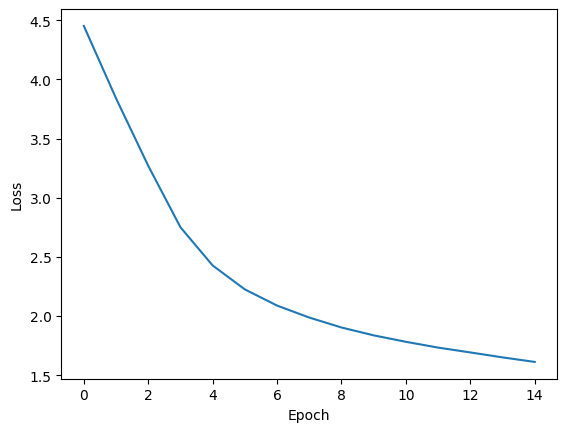

In [14]:
import matplotlib.pyplot as plt

plt.plot(loss_graph)

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


In [15]:
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx))

In [17]:
from torchtext.data.metrics import bleu_score
from nltk.translate.bleu_score import sentence_bleu

load = iter(test_loader)
num_reports = 20

tot_score = 0

for i in range(num_reports): 
    print('Report ', i)

    image, report = next(load)
    image = image.to(device)

    out = model.generate_report(image, dataset.idx2token, max_length=100)
    report = [dataset.itos(x) for x in report.squeeze().tolist()]

    if len(out) < len(report):
        tot_score += bleu_score(out, report[:len(out)]) 

    else:
        tot_score += bleu_score(out[:len(report)], report)  


    print(" ".join(out))
    print(" ".joinreport)

print("AVG BLEU SCORE:", tot_score/num_reports)

Report  0


AssertionError: ignored

In [ ]:
from torchtext.data.metrics import bleu_score
from nltk.translate.bleu_score import sentence_bleu

load = iter(test_loader)
num_reports = 20

tot_score = 0

# Federated Learning Experiment

In [ ]:
epochs = 5
batch_size = 64
embed_size = 256
hidden_size = 128
num_layers = 2
learning_rate = 3e-3

client1_data, client2_data, client3_data, test_data = random_split(dataset, [1000 , 1000, 1000, 197])

client1_loader = DataLoader(client1_data, batch_size=batch_size, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx))
client2_loader = DataLoader(client2_data, batch_size=batch_size, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx))
client3_loader = DataLoader(client3_data, batch_size=batch_size, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx))
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx))

client1 = CNNtoRNN(embed_size, hidden_size, dataset.vocab_size , num_layers).to(device)
client2 = CNNtoRNN(embed_size, hidden_size, dataset.vocab_size , num_layers).to(device)
client3 = CNNtoRNN(embed_size, hidden_size, dataset.vocab_size , num_layers).to(device)

global_model = CNNtoRNN(embed_size, hidden_size, dataset.vocab_size , num_layers).to(device) 

client1_optim = optim.Adam(client1.parameters(), lr=learning_rate)
client2_optim = optim.Adam(client2.parameters(), lr=learning_rate)
client3_optim = optim.Adam(client3.parameters(), lr=learning_rate)

client1_criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)
client2_criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)
client3_criterion = nn.CrossEntropyLoss(ignore_index=pad_idx)

In [ ]:
def train_one_epoch(model, loader, optimizer, criterion):
    
    model.train()
    num_batches = len(loader)
    running_loss = 0

    for imgs, reports in loader: 
        
        imgs = imgs.to(device)
        reports = reports.to(device)

        outputs = model(imgs, reports[:, :-1])
        outputs = outputs.permute(0,2,1)

        loss = criterion(outputs, reports)

        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print('Loss = ', running_loss/num_batches)
    
    return running_loss / num_batches

        


In [ ]:
client1_loss = []
client2_loss = []
client3_loss = []

for epoch in epochs:
    client1_loss.append(train_one_epoch(client1, client1_loader, client1_optim, client1_criterion))
    client2_loss.append(train_one_epoch(client2, client2_loader, client2_optim, client2_criterion))
    client3_loss.append(train_one_epoch(client3, client3_loader, client3_optim, client3_criterion))

    print("Averaging the Weights")

    cline


# Component Testing

In [ ]:
data = IUDataset('/content/drive/MyDrive/IU_Dataset', 'iu_data_new.csv')
pad_idx = data.stoi('<pad>')
dataloader = DataLoader(data, batch_size=32, shuffle=True, collate_fn=MyCollate(pad_idx=pad_idx))

test = iter(dataloader)
imgs, reports = next(test)

In [ ]:
print(reports.shape)
print(imgs.shape)

input = reports[:, :-1]

print(input.shape)

before = [data.itos(int(x)) for x in reports[0, :]]
after  = [data.itos(int(x)) for x in input[0, :]]

print(' '.join(before))
print(' '.join(after))






torch.Size([32, 66])
torch.Size([32, 3, 224, 224])
torch.Size([32, 65])
<start> cardiac and mediastinal contours are within normal limits . the lungs are clear . bony structures are intact . <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
<start> cardiac and mediastinal contours are within normal limits . the lungs are clear . bony structures are intact . <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


In [ ]:
encoder = EncoderCNN(256)
decoder = DecoderRNN(256, 256, data.vocab_len, 1)

In [ ]:
encoder_out = encoder(imgs)
print(encoder_out.shape)

# decoder_out = decoder(encoder_out, reports)

torch.Size([32, 256])


In [ ]:
decoder_out = decoder(encoder_out, reports)
decoder_out.shape

features shape torch.Size([32, 1, 256])
embeds shape torch.Size([32, 66, 256])


torch.Size([32, 67, 1119])

In [ ]:
data = IUDataset('/content/drive/MyDrive/IU_Dataset', 'iu_data_new.csv')

img, r = data.__getitem__(0)

print(img.shape)
print(r.shape)

<class 'torch.Tensor'>
torch.Size([3, 224, 224])
torch.Size([41])


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IU_Dataset/iu_data_new.csv')
data = data.dropna(subset=['findings'])
data['findings'] = data['findings'].map(clean_report)

token2idx, idx2token = create_vocabulary(data)

data['tokens'] = data['findings'].map(lambda r: tokenize(token2idx, r))

sample_report = data['findings'].tolist()

r = sample_report[10]

print(r)

print("<start> id:", token2idx['<start>'])
print("<end> id:", token2idx['<end>'])

# sample_tokens = data['tokens'].tolist()[10]
# sample_decoded = " ".join([idx2token[x] for x in sample_tokens])


# print(sample_report)
# print(sample_tokens)
# print(sample_decoded)


print()
# for i,k in enumerate(token2idx.keys()): 
#     print(f"{i}) {k}")

<start> lungs are clear bilaterally . cardiac and mediastinal silhouettes are normal . pulmonary vasculature is normal . no pneumothorax or pleural effusion . no acute bony abnormality . <end>
<start> id: 28
<end> id: 27



In [ ]:
class IUDataset(Dataset): 
    def __init__(self, root, data_file):
        self.root = root
        self.data = load_data(os.path.join(root, data_file))
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
    def __len__(self): 
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        
        img_path = os.path.join(self.root, row['filename'])
        report = row['findings']

        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)

        print(type(img))
        if isinstance(report, float): 
            print("ERROR ")

        return (img, report)

In [ ]:
token2idx['<unk>']

27

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IU_Dataset/iu_data_new.csv')
print('before', len(data))
data = data.dropna(subset=['findings'])
print('after', len(data))

# report = data['findings'][59]

# out = iu_clean_report(report)
# print(out)
# data.head()

before 3687
after 3197


In [ ]:
root = "/content/drive/MyDrive/IU_Dataset/"
df = pd.read_csv(os.path.join(root, "iu_data.csv"))
df_new = pd.read_csv(os.path.join(root, "iu_data_new.csv"))

print(len(df))
print(len(df_new))

3818
3687


# Extra Code


In [ ]:
#import wordninja

def clean_text(text):
    # Define regular expressions to match non-ASCII characters and punctuation
    non_ascii_regex = re.compile(r'[^\x00-\x7F]+')
    punctuation_regex = re.compile('[%s]' % re.escape(string.punctuation))

    text = text.lower()

    # Remove non-ASCII characters and punctuation from the text
    text = non_ascii_regex.sub('', text)
    text = punctuation_regex.sub('', text)
    text = re.sub(r'\b\w*xx\w*\b', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Add a space to split words apart
    text = text.replace('cm', '')
    text = text.replace('mm', '')
    text = text.replace('wellaerated', 'well aerated')
    text = text.replace('wellinflated', 'well inflated')
    text = text.replace('fracturedislocation', 'fracture dislocation')
    text = text.replace('thickeningscarring', 'thickening scarring')
    text = text.replace('righttoleft', 'right to left')
    text = text.replace('nodulemass', 'nodule mass')
    text = text.replace('nearcomplete', 'near complete')
    text = text.replace('findingsopacitiesinfiltrates', 'findings opacities infiltrates')
    text = text.replace('limitsthe', 'limits the')
    text = text.replace('chronicappearing', 'chronic appearing')
    text = text.replace('inthe', 'in the')
    text = text.replace('pullthrough', 'pull through')
    text = text.replace('thickeningsclerosis', 'thickening sclerosis')

    if not text:
        text = '<UNK>'

    text = re.sub(' +', ' ', text)

    # Return the cleaned text
    return text.strip()


def load_data(data_path): 
    df = pd.read_csv(data_path)
    df['findings'].fillna('', inplace=True)
    df['findings'] = df['findings'].apply(clean_text)

    return df

In [ ]:

import nltk
nltk.download('words')

from nltk.corpus import words

root = "/content/drive/MyDrive/IU_Dataset"
data_file = "iu_data_new.csv"

os.path.join(root, data_file)

df = load_data(os.path.join(root, data_file))
reports = df['findings'].tolist()

text = ' '.join(reports)
tokens = text.split()

counter = Counter(tokens)

vocab = sorted(counter, key=counter.get, reverse=True)
vocab_size = len(vocab)

word2idx = {word: ind for ind, word in enumerate(vocab)}
idx2word = dict((v, k) for k, v in word2idx.items())

print(len(word2idx))

1580


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
for r in reports: 
    words = r.split(' ')
    # print(r)
    if '' in words: 
        print('EMPTY SPACE')
        print(r)
        print(words)
    
    t = [word2idx[w] for w in words]

    print(t)

# exit()

# t = [word2idx[w] for w in r]
# x = [idx2word[i] for i in t]

# print(r) 
# print(t)
# print(x)

[0, 52, 22, 5, 32, 14, 2, 16, 4, 18, 10, 3, 1, 20, 82, 10, 3, 1, 15, 21, 10, 2, 1, 7, 43, 6, 11, 10, 3, 1, 59, 7, 8]
[284, 104, 146, 142, 89, 20, 428, 17, 13, 429]
[42]
[10, 2, 244, 88, 106, 5, 151, 63, 141, 30, 134, 413, 29, 31, 5, 614, 227, 10, 2, 452, 63, 19, 0, 27, 29, 233, 382, 307, 172, 43, 477, 478, 19, 0, 27, 29, 1059, 2, 196, 63, 19, 0, 23, 60, 68, 97, 0, 26, 22, 3, 4, 19, 14, 5, 41, 10, 3, 1, 8, 9, 46, 6, 11]
[0, 26, 22, 5, 20, 64, 2, 16, 4, 18, 10, 3, 1, 8, 9, 6, 11, 10, 2, 1, 15, 113, 7, 21, 333, 148, 2, 75, 93, 285, 216, 10, 3, 308, 6, 240, 90, 124, 79, 109, 136, 13]
[12, 14, 5, 24, 41, 2, 16, 4, 18, 10, 3, 1, 15, 25, 21, 9, 126, 20, 55, 1, 8, 9, 46, 6, 11, 45, 44, 186, 7, 0, 39, 35]
[0, 52, 38, 2, 4, 171, 76, 0, 13, 2, 17, 39, 190, 73, 286, 666]
[0, 12, 20, 5, 32, 2, 16, 4, 18, 10, 3, 1, 6, 11, 9, 8, 10, 3, 1, 15, 74, 86, 55, 62, 145, 43, 108, 10, 3, 165, 850, 286, 535, 344, 736, 479]
[0, 122, 218, 7, 121, 5, 67, 212, 7, 0, 69, 0, 52, 22, 3, 129, 89, 10, 158, 205, 508, 98

In [ ]:
dataset = IUDataset(root="/content/drive/MyDrive/IU_Dataset", data_file="iu_data_new.csv")

print('tot data size', dataset.__len__())

train_dataset, test_dataset = random_split(dataset, [0.9, 0.1])

print('train size', train_dataset.__len__())
print('test size', test_dataset.__len__())

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=True)
data_loader = DataLoader(dataset, batch_size=256, shuffle=True)

tot data size 3687
train size 3319
test size 368


In [ ]:
import matplotlib.pyplot as plt

d = IUDataset(root="/content/drive/MyDrive/IU_Dataset", data_file="iu_data.csv")

img, report = d.__getitem__(0)

print("report", report)
print("img", img.shape)

plt.imshow(img.permute(1,2,0))
plt.axis('off')

In [ ]:
# Testing dataloaders

for i, batch in enumerate(data_loader):
    print('batch', i)

batch 0
batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
batch 7
batch 8
batch 9
batch 10
batch 11
batch 12
batch 13
batch 14


In [ ]:
class Encoder()